In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np


In [14]:
train_dir = "C:/Users/salve/OneDrive/Desktop/cifar-10-img/cifar-10-img/train"
test_dir = "C:/Users/salve/OneDrive/Desktop/cifar-10-img/cifar-10-img/test"

In [16]:
train_dir

'C:/Users/salve/OneDrive/Desktop/cifar-10-img/cifar-10-img/train'

In [18]:
test_dir

'C:/Users/salve/OneDrive/Desktop/cifar-10-img/cifar-10-img/test'

In [20]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
)

test_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
)

In [22]:
# here batch_size is the number of images in each batch

train_batch_size = 5000
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=train_batch_size,
    class_mode='categorical'
)

test_batch_size = 1000
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(32, 32),
    batch_size=test_batch_size,
    class_mode='categorical'
)

Found 40079 images belonging to 10 classes.
Found 9921 images belonging to 10 classes.


In [24]:
x_train, y_train =  train_generator[0]
x_test, y_test = test_generator[0]

print(len(x_train))
print(len(x_test))

5000
1000


In [28]:
# Load VGG16 without top layers
weights_path = "C:/Users/salve/Downloads/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(32, 32, 3))

In [30]:
for layer in base_model.layers:
   layer.trainable = False 

In [32]:
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
predictions = Dense(10, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
# Train the model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 22s 246ms/step - accuracy: 0.2194 - loss: 2.1560 - val_accuracy: 0.4260 - val_loss: 1.6285
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 22s 273ms/step - accuracy: 0.4238 - loss: 1.6035 - val_accuracy: 0.4900 - val_loss: 1.4949
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 25s 314ms/step - accuracy: 0.4935 - loss: 1.4475 - val_accuracy: 0.5080 - val_loss: 1.4002
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 26s 331ms/step - accuracy: 0.5289 - loss: 1.3549 - val_accuracy: 0.5270 - val_loss: 1.3499
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 26s 331ms/step - accuracy: 0.5525 - loss: 1.2693 - val_accuracy: 0.5440 - val_loss: 1.3118
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 27s 347ms/step - accuracy: 0.5856 - loss: 1.1922 - val_accuracy: 0.5390 - val_loss: 1.3029
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 30s 376ms/step - accuracy: 0.5919 - loss: 1.1646 - val_accuracy: 0.5350 - val_loss: 1.2909
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 28s 356ms/step - accuracy: 0.6311 - loss: 1.0502 - val_accu

In [36]:
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(32, 32, 3))
# freeze all layers first
for layer in base_model.layers:
   layer.trainable = False
# unfreeze last 4 layers of base model
for layer in base_model.layers[len(base_model.layers) - 4:]:
   layer.trainable = True
# fine-tuning hyper parameters
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
predictions = Dense(10, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# training fine tuned model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 48s 559ms/step - accuracy: 0.2138 - loss: 2.1052 - val_accuracy: 0.4980 - val_loss: 1.3905
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 46s 586ms/step - accuracy: 0.5211 - loss: 1.3173 - val_accuracy: 0.5620 - val_loss: 1.3121
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 46s 582ms/step - accuracy: 0.6141 - loss: 1.1225 - val_accuracy: 0.6310 - val_loss: 1.1501
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 47s 590ms/step - accuracy: 0.7069 - loss: 0.8667 - val_accuracy: 0.6460 - val_loss: 1.0848
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 46s 580ms/step - accuracy: 0.7561 - loss: 0.7236 - val_accuracy: 0.6490 - val_loss: 1.1390
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 46s 584ms/step - accuracy: 0.8022 - loss: 0.5982 - val_accuracy: 0.5580 - val_loss: 1.3418
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 47s 594ms/step - accuracy: 0.7867 - loss: 0.6083 - val_accuracy: 0.6530 - val_loss: 1.2967
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 47s 592ms/step - accuracy: 0.8376 - loss: 0.4846 - val_accu

In [38]:
import matplotlib.pyplot as plt
predicted_value = model.predict(x_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 128ms/step


In [40]:
labels = list(test_generator.class_indices.keys())

Preditcted:  horse
Actual:  deer


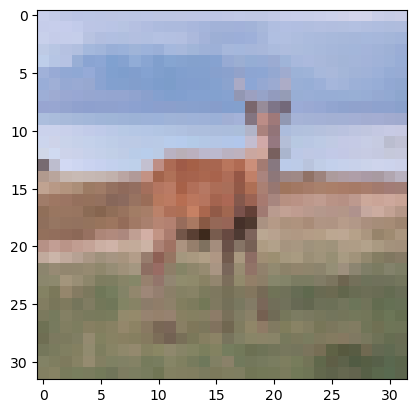

In [42]:
n=945
plt.imshow(x_test[n])
print("Preditcted: ",labels[np.argmax(predicted_value[n])])
print("Actual: ", labels[np.argmax(y_test[n])])

Preditcted:  dog
Actual:  dog


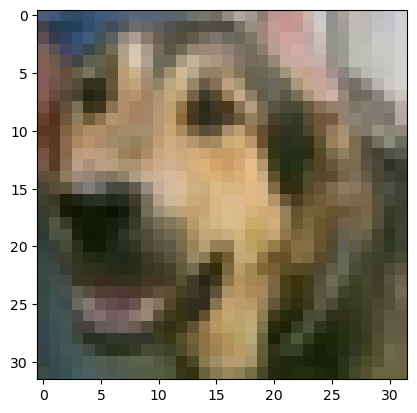

In [46]:
n=9
plt.imshow(x_test[n])
print("Preditcted: ",labels[np.argmax(predicted_value[n])])
print("Actual: ", labels[np.argmax(y_test[n])])

Preditcted:  horse
Actual:  horse


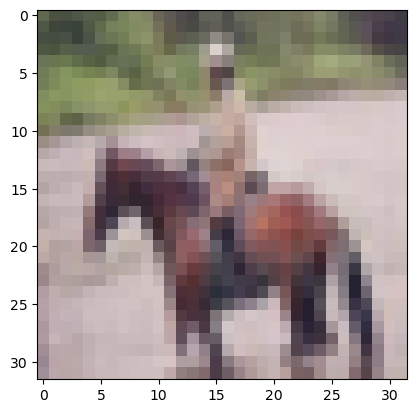

In [48]:
n=5
plt.imshow(x_test[n])
print("Preditcted: ",labels[np.argmax(predicted_value[n])])
print("Actual: ", labels[np.argmax(y_test[n])])